Saving product_return.csv to product_return (1).csv
🔍 First few rows of the data:
   purchase_amount  review_score  days_to_delivery returned
0       687.011818      3.778615                 4       no
1       325.972093      2.458683                 1      yes
2       685.382724      3.954024                 7       no
3       291.100577      3.666468                14      yes
4       209.806672      1.478248                 2       no

✅ Model Evaluation:
Accuracy:  0.55
Precision: 0.57
Recall:    0.73


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129482 (\N{ICE CUBE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


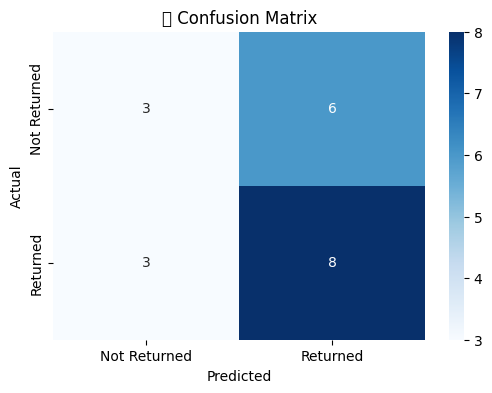

In [5]:
# Import the required libraries
import pandas as pd  # For working with data
import seaborn as sns  # For making plots
import matplotlib.pyplot as plt  # For showing plots
from sklearn.model_selection import train_test_split  # To split data
from sklearn.ensemble import RandomForestClassifier  # The model
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score  # For evaluation

# Step 1: CSV file
from google.colab import files
uploaded = files.upload()

# Step 2: Read the CSV file
import io
file_name = list(uploaded.keys())[0]  # Get the name of the uploaded file
data = pd.read_csv(io.BytesIO(uploaded[file_name]))  # Load data into a table

# Step 3: Look at the data
print("🔍 First few rows of the data:")
print(data.head())

# Step 4: Change 'yes' and 'no' to 1 and 0
data['returned'] = data['returned'].map({'yes': 1, 'no': 0})

# Step 5: Separate the input (features) and the output (target)
X = data.drop('returned', axis=1)  # Input features
y = data['returned']              # Target we want to predict

# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)  # Learn from training data

# Step 8: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 9: Check how good the model is
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("\n✅ Model Evaluation:")
print(f"Accuracy:  {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")

# Step 10: Show a confusion matrix as a heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Returned', 'Returned'],
            yticklabels=['Not Returned', 'Returned'])
plt.title("🧊 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()